https://deeplizard.com/resources

In [1]:
print('ok')

ok


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, AvgPool2D 
from keras.layers import BatchNormalization, Dropout

## Data Loader
apple - 0

tomato - 1

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = "test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


# Normalization

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(AvgPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

c:\Users\mdabd\anaconda3\envs\cvdev\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 62, 62, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5816 - loss: 8.8587 - val_accuracy: 0.4021 - val_loss: 1.5719
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6701 - loss: 5.2310 - val_accuracy: 0.5567 - val_loss: 2.4910
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6837 - loss: 5.0219 - val_accuracy: 0.5567 - val_loss: 4.0272
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7143 - loss: 4.1353 - val_accuracy: 0.5567 - val_loss: 7.3012
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7721 - loss: 2.7560 - val_accuracy: 0.5670 - val_loss: 8.2766
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7959 - loss: 3.0877 - val_accuracy: 0.5670 - val_loss: 7.5841
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8061 - loss: 2.1115 - val_accuracy: 0.5464 - val_loss: 5.6564
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8503 - loss: 1.7260 - val_accuracy: 0.5567 - val_loss:

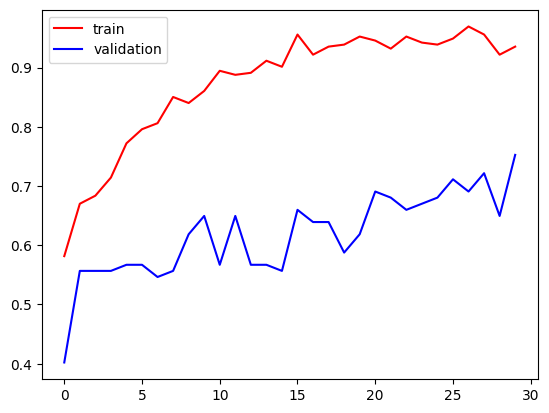

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
     


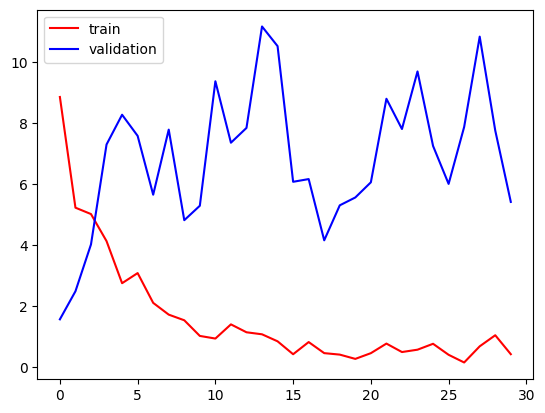

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## ways to reduce overfitting
- Add more data
- Data Augmentation
- Dropout
- Batch Norm
- Reduce complexity

# Inference

D:\Computer_Vision\B_Convolutional_NN\

In [109]:
import os
print(os.path.exists("test/apples/img_p1_9.jpeg"))

True


In [110]:
import os
print(os.getcwd())

d:\Computer_Vision\B_Convolutional_NN


In [143]:
import cv2

test_img = cv2.imread("test/apples/img_p2_116.jpeg")
test_img.shape

(195, 259, 3)

In [144]:
test_img.shape

(195, 259, 3)

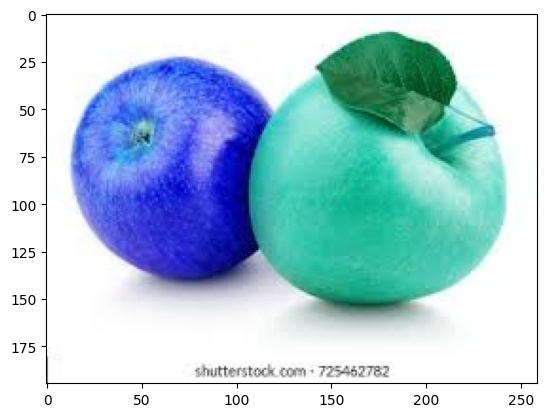

In [145]:
plt.imshow(test_img)

In [146]:
test_img.shape

(195, 259, 3)

In [147]:
test_img = cv2.resize(test_img,(256,256))

In [148]:
test_img.shape

(256, 256, 3)

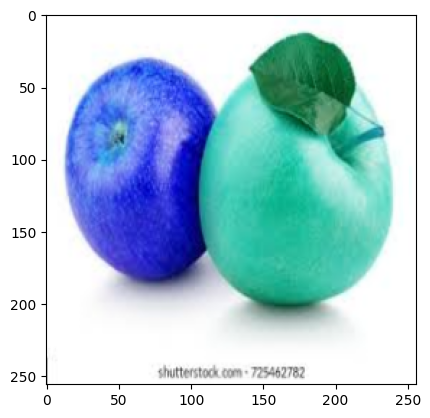

In [149]:
plt.imshow(test_img)

In [150]:
test_input = test_img.reshape((1,256,256,3))

In [151]:
result = model.predict(test_input)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.]], dtype=float32)

In [152]:
if int(result[0][0]) == 0:
  print("Apple")

else:
  print("Tomato")

Apple
